<a href="https://colab.research.google.com/github/SaurabhSRP/POC-CNN/blob/main/POC_CNN_Transfer_learning_with_data_augementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.8MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 2s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 32
##initialise the imagedataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

#get the data from the directory
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-13-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 179s 274ms/step - loss: 0.3135 - accuracy: 0.8634 - val_loss: 0.2245 - val_accuracy: 0.9050
Epoch 2/10
625/625 [==============================] - 171s 274ms/step - loss: 0.2386 - accuracy: 0.8971 - val_loss: 0.2227 - val_accuracy: 0.9090
Epoch 3/10
625/625 [==============================] - 170s 272ms/step - loss: 0.2221 - accuracy: 0.9066 - val_loss: 0.2436 - val_accuracy: 0.8984
Epoch 4/10
625/625 [==============================] - 169s 270ms/step - loss: 0.2157 - accuracy: 0.9081 - val_loss: 0.1975 - val_accuracy: 0.9132
Epoch 5/10
625/625 [==============================] - 169s 271ms/step - loss: 0.2055 - accuracy: 0.9122 - val_loss: 0.1919 - val_accuracy: 0.9180
Epoch 6/10
625/625 [==============================] - 169s 271ms/step - loss: 0.1932 - accuracy: 0.9186 - val_loss: 0.2022 - val_accuracy: 0.9114
Epoch 7/10
625/625 [==============================] - 170s 272ms/step - loss: 0.1909 - accuracy: 0.9184 - val_loss: 0.1896 -

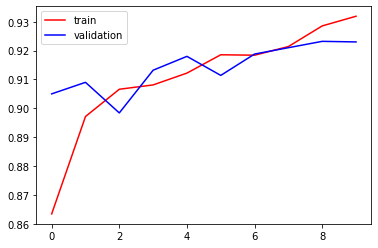

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

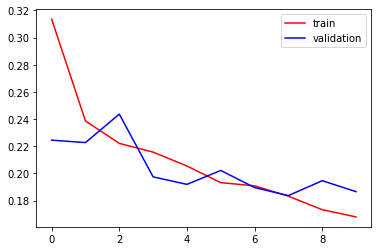

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()